In [1]:
import pandas as pd

In [2]:
import numpy as np

In [27]:
import datetime as dt

In [63]:
from collections import Counter

### Import Data

In [4]:
XRP_Increase = pd.read_csv('XRP_5min_Increase_SmallAmount.csv')

In [6]:
XRP_Increase.head()

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,168H_RA_on_Close,Increase_0.1_percent,Increase_0.2_percent,Increase_0.30000000000000004_percent,Increase_0.4_percent,Increase_0.5_percent,Increase_0.6000000000000001_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.5_percent
0,0,0,0.024997,1424462400,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,...,NaN,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100
1,1,1,0.024997,1424462700,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,...,NaN,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100
2,2,2,0.024997,1424463000,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,...,NaN,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100
3,3,3,0.024997,1424463300,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,...,NaN,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100
4,4,4,0.024997,1424463600,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,...,NaN,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100,1455002100


In [49]:
np.array( [1,2,3,4,5,6])*0.1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [50]:
for n in np.array( [1,2,3,4,5,6])*0.1:
    XRP_Increase['shift_open_{}'.format(n)] = XRP_Increase['Increase_{}_percent'.format(n)].shift(1)

for 0.6% incraese:

how many continous increase are there?

In [59]:
XRP_Increase['diff_0.6'] = XRP_Increase['shift_open_0.6000000000000001'] - XRP_Increase['Increase_0.6000000000000001_percent']

In [71]:
list(Counter(XRP_Increase['diff_0.6']).keys())[:3]

[nan, 0.0, 29763000.0]

In [ ]:
XRP_Increase['diff_0.6']

In [84]:
(XRP_Increase[XRP_Increase['diff_0.6'] != 0]['diff_0.6'].value_counts())/(len(XRP_Increase))

NameError: name 'plt' is not defined

In [86]:
XRP_Increase[XRP_Increase['diff_0.6'] != 0]['diff_0.6'].value_counts()#.plot()

-3.000000e+02    49080
 3.000000e+02     8216
-6.000000e+02     6844
-9.000000e+02     4038
 6.000000e+02     3682
-1.200000e+03     2771
 9.000000e+02     2549
-1.500000e+03     2219
 1.200000e+03     1888
-1.800000e+03     1704
 1.500000e+03     1526
-2.100000e+03     1428
 1.800000e+03     1278
-2.400000e+03     1139
 2.100000e+03     1039
-2.700000e+03      991
 2.400000e+03      908
-3.000000e+03      887
-3.300000e+03      798
 2.700000e+03      780
 3.300000e+03      722
 3.000000e+03      722
-3.600000e+03      701
-3.900000e+03      639
-4.200000e+03      615
 3.600000e+03      563
 3.900000e+03      550
-4.500000e+03      544
 4.200000e+03      514
 4.500000e+03      482
                 ...  
 1.914661e+09        1
-4.014900e+06        1
-2.545200e+06        1
 1.043100e+07        1
-1.894923e+09        1
-2.608500e+06        1
 1.914678e+09        1
 2.608800e+06        1
 1.043550e+07        1
 4.014300e+06        1
 2.609100e+06        1
 2.606400e+06        1
-6.714000e+

In [55]:
n = 6*0.1

In [ ]:
XRP_Increase['Open_0.6_shift']

In [ ]:
XRP_Increase['LL_at_0,1'] = 

## Adjust for waiting

In [8]:
XRP_Analysis_table = XRP_Increase

In [10]:
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(2*2).mean().shift(1)

In [102]:
time_event = {}
starting_asset = 50
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.01
sell_limit = 0.006

while gold_available >= 0:
    
    #for ind, df in XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'].iterrows():
    for ind, df in XRP_Analysis_table[-5000:].iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= drop_limit:
                "then buy crypto"
                
                ## might add here a waiting time!!! ###

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )
                
                if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [103]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

In [104]:
transation_log['Gold'] = round(transation_log['Gold'], 2)

In [105]:
transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [106]:
transation_log.head()

,Gold,XRP_Amount,action,price_action_happened
1563203400,0.00,157.9078,brought,0.316007
1563205500,50.40,0.0000,sell_profit,0.319790
1563206700,0.00,158.6110,brought,0.317100
1563207600,50.65,0.0000,sell_profit,0.320000
1563208200,0.00,160.1700,brought,0.315619


In [107]:
dt.datetime.fromtimestamp(transation_log.index.min())

datetime.datetime(2019, 7, 15, 16, 10)

In [111]:
dt.datetime.fromtimestamp(transation_log.index.max())

datetime.datetime(2019, 7, 31, 13, 40)

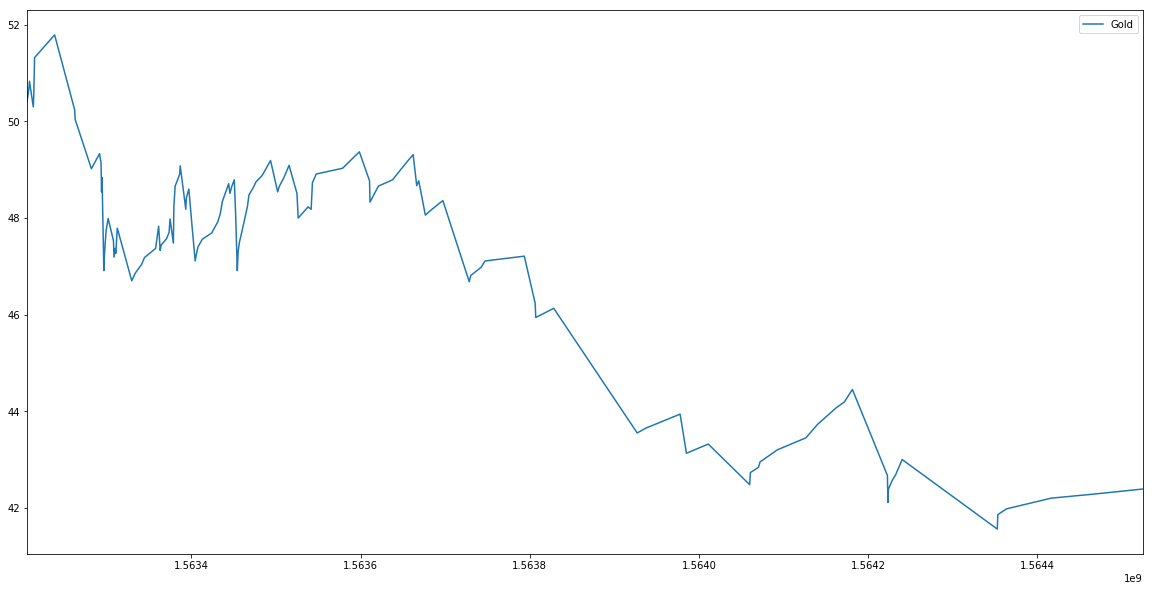

In [108]:
transation_log[transation_log['action'] != 'brought'][['Gold']].plot(figsize = (20,10))

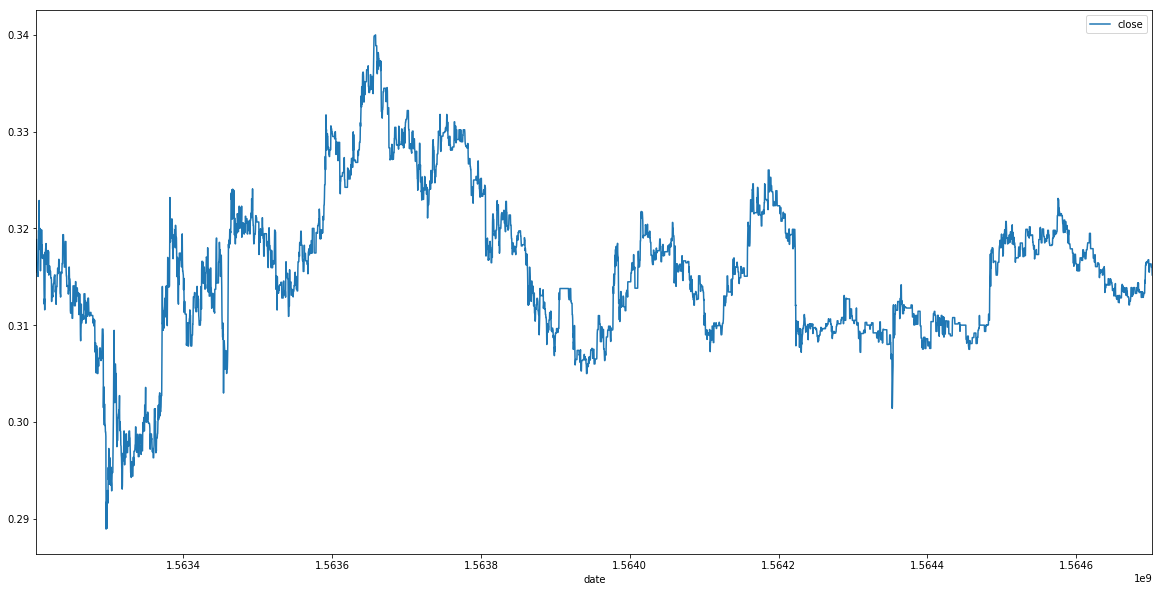

In [109]:
XRP_Analysis_table[-5000:][['date','close']].set_index('date').plot(figsize = (20,10))

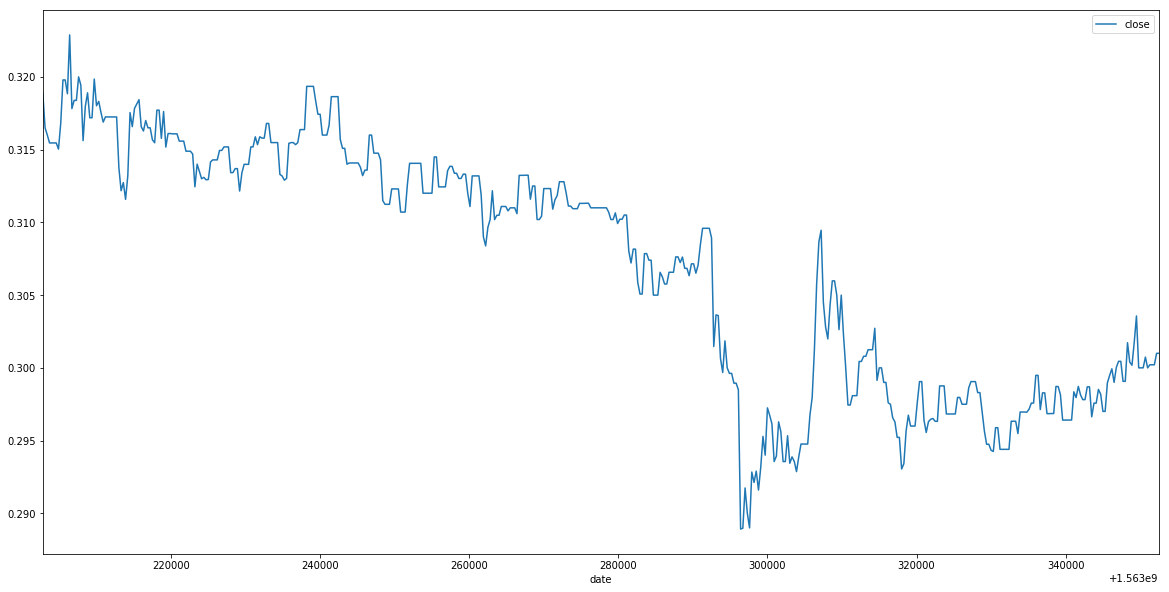

In [114]:
XRP_Analysis_table[-5000:-4500][['date','close']].set_index('date').plot(figsize = (20,10))

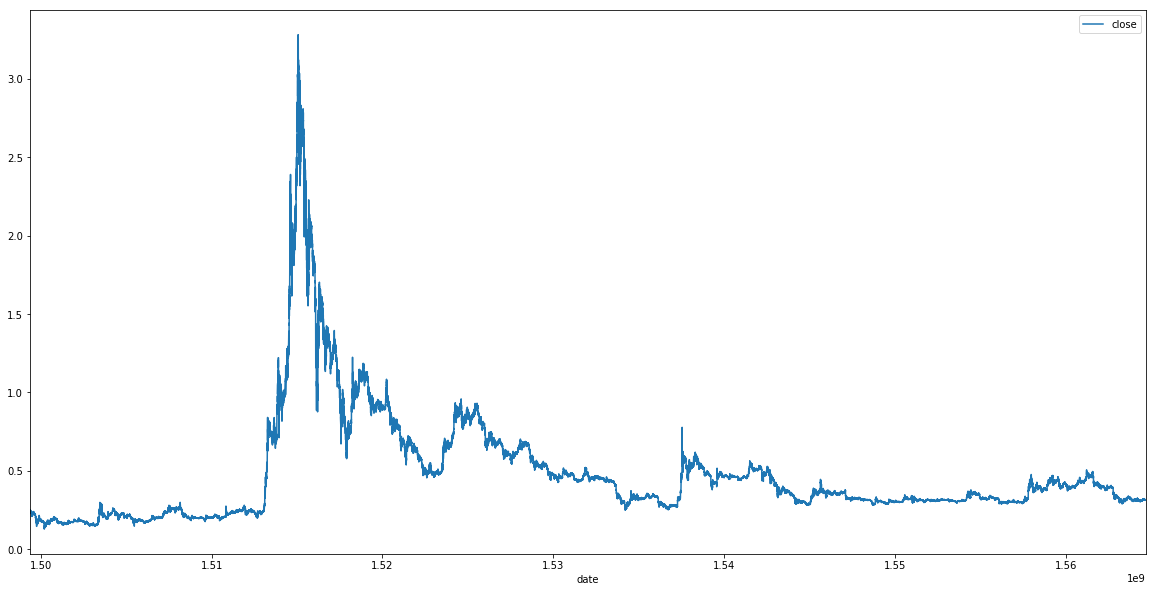

In [110]:
XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'][['date','close']].set_index('date').plot(figsize = (20,10))

In [19]:
transation_log['action'].unique()

array(['brought', 'stop_loss_hit', 'sell_profit'], dtype=object)